Student Name: Ruochen Zhao

In [ ]:
# Install and import packages for later analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pingouin
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Part 1: Exploratory Data Analysis

In [ ]:
# Load and prepare the data
df = pd.read_csv("INF2178_A3_data.csv")
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [ ]:
# Check NaN values in the data set
nan_counts = df.isna().sum()

print(nan_counts)

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64


In [ ]:
# Check for column types
column_types = df.dtypes
print(column_types)

fallreadingscore               float64
fallmathscore                  float64
fallgeneralknowledgescore      float64
springreadingscore             float64
springmathscore                float64
springgeneralknowledgescore    float64
totalhouseholdincome           float64
incomeinthousands              float64
incomegroup                      int64
dtype: object


In [ ]:
# Find out how income range is related to income group
income_ranges = {}

# Loop through each unique value in the incomegroup column
for group in df['incomegroup'].unique():
    # Filter the DataFrame for the current group
    group_data = df[df['incomegroup'] == group]['incomeinthousands']
    # Calculate the minimum and maximum income in thousands for the current group
    income_ranges[group] = (group_data.min(), group_data.max())

# Now income_ranges dictionary will have the income range for each group
for group, ranges in income_ranges.items():
    print(f"Group {group} income range: {ranges[0]} to {ranges[1]} thousand dollars")


Group 3 income range: 70.0 to 150.0 thousand dollars
Group 2 income range: 40.0 to 69.6999969482422 thousand dollars
Group 1 income range: 0.0010000000474974 to 39.7999992370605 thousand dollars


In [ ]:
# Make sure 'incomegroup' is a categorical variable
df['incomegroup'] = df['incomegroup'].astype('category')

In [ ]:
# Summary statistics
print(df.describe())

       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000                     7.858000   
25%

<ipython-input-36-a188849aff78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


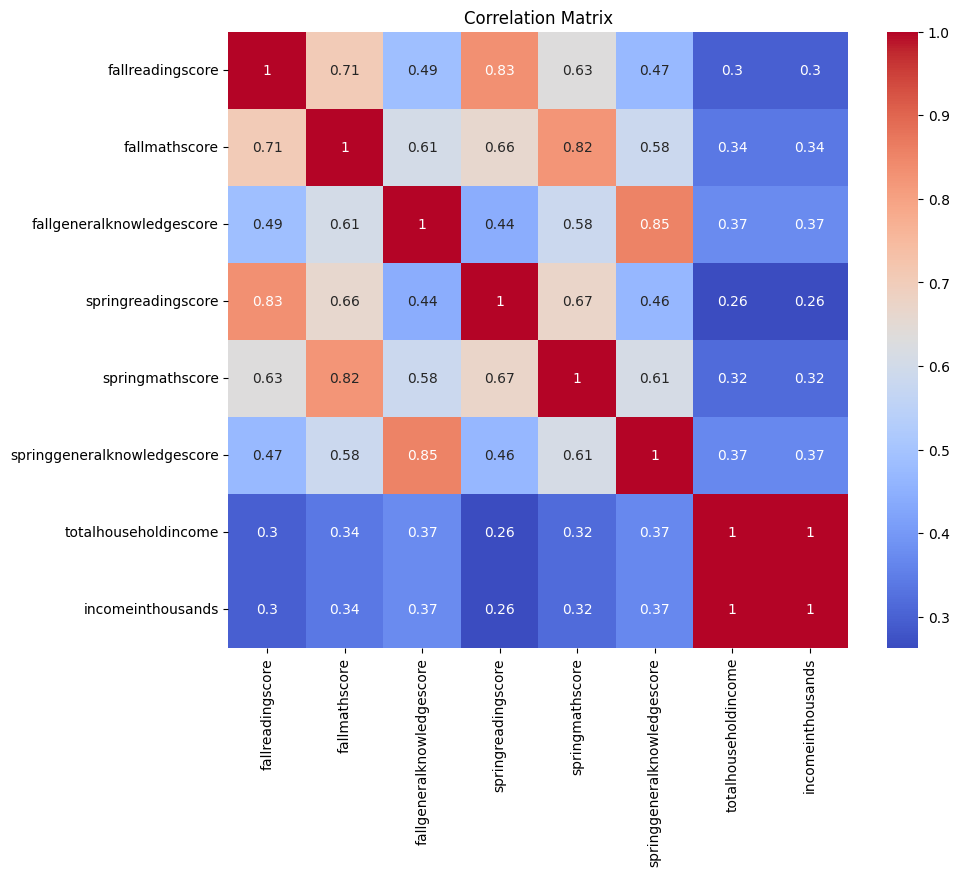

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Research Question 1: How do income groups influence the spring reading scores among kindergarten students, after controlling for their fall reading scores?

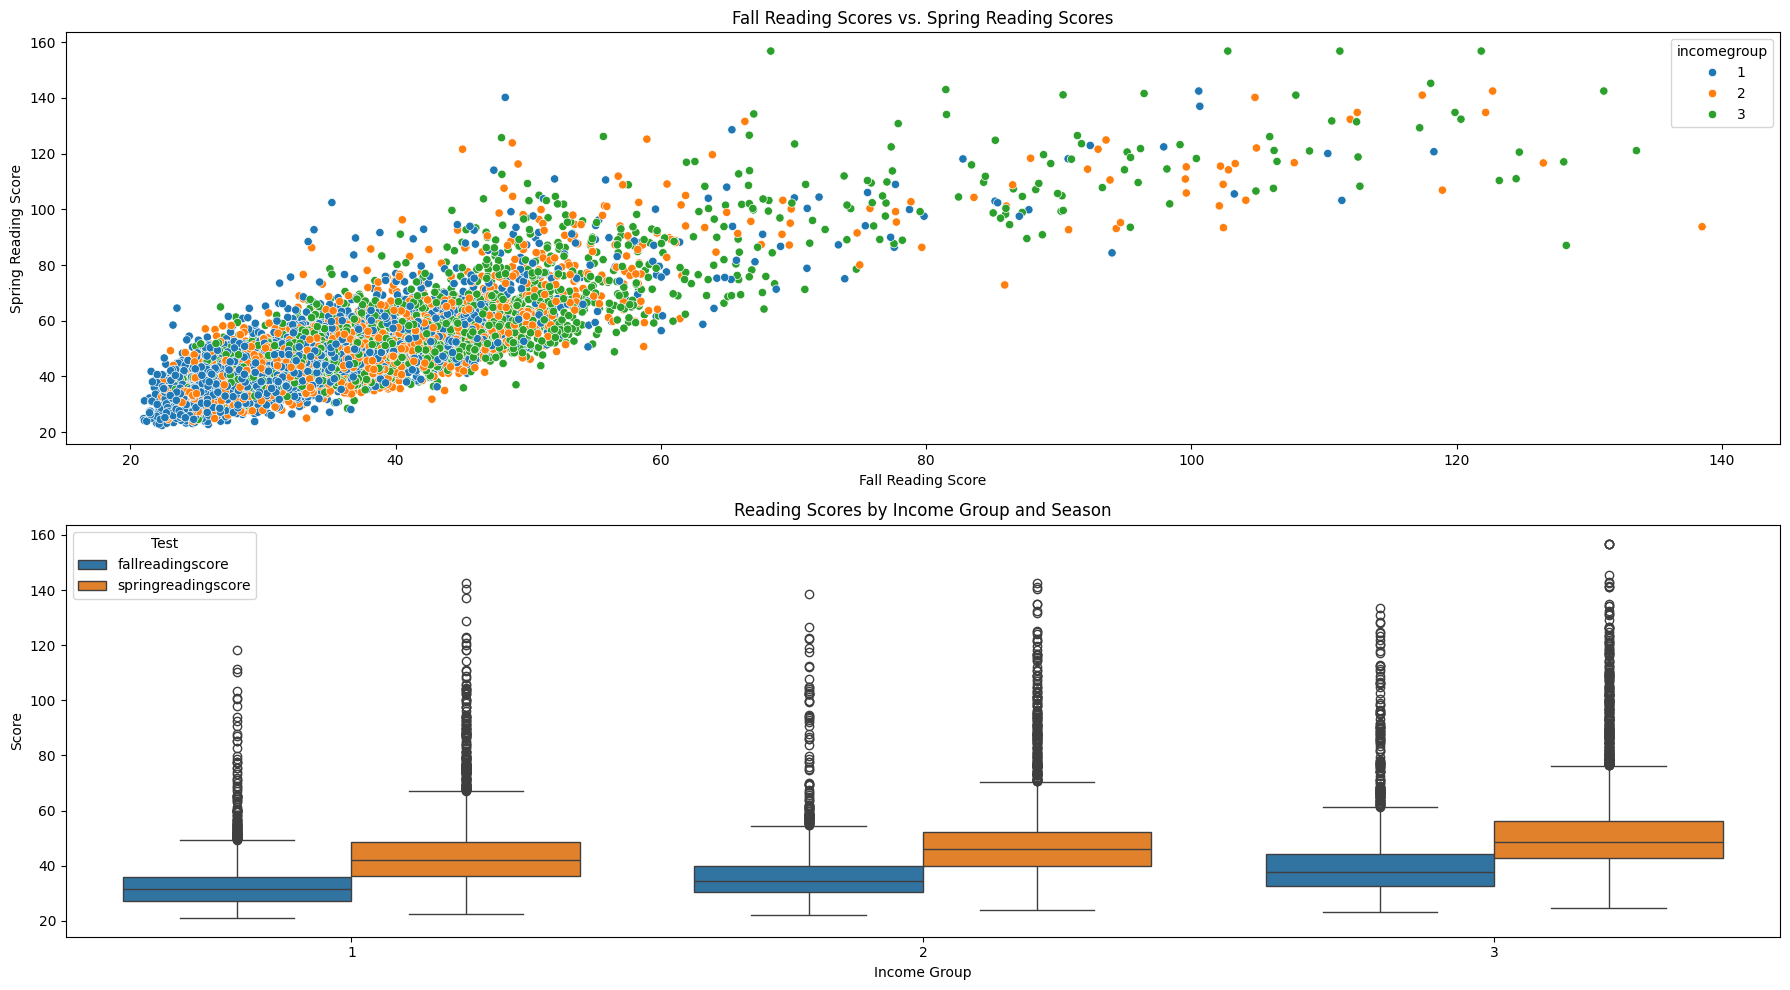

In [ ]:
# Correcting the subplot creation for a single-column subplot layout
fig, axs = plt.subplots(nrows=2, figsize=(18, 10))

# Scatter plot for fall reading scores vs. spring reading scores
sns.scatterplot(data=df, x="fallreadingscore", y="springreadingscore", hue="incomegroup", ax=axs[0])
axs[0].set_title('Fall Reading Scores vs. Spring Reading Scores')
axs[0].set_xlabel('Fall Reading Score')
axs[0].set_ylabel('Spring Reading Score')

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted_r = df.melt(id_vars='incomegroup', value_vars=['fallreadingscore', 'springreadingscore'],
                     var_name='test', value_name='score')

# Create a boxplot
sns.boxplot(data=df_melted_r, x='incomegroup', y='score', hue='test', ax=axs[1])
axs[1].set_title('Reading Scores by Income Group and Season')
axs[1].set_xlabel('Income Group')
axs[1].set_ylabel('Score')

# Adjust the legend for the second plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels, title='Test')

# Display the plot
plt.tight_layout()
plt.show()

### One-way ANCOVA test

<Figure size 1000x600 with 0 Axes>

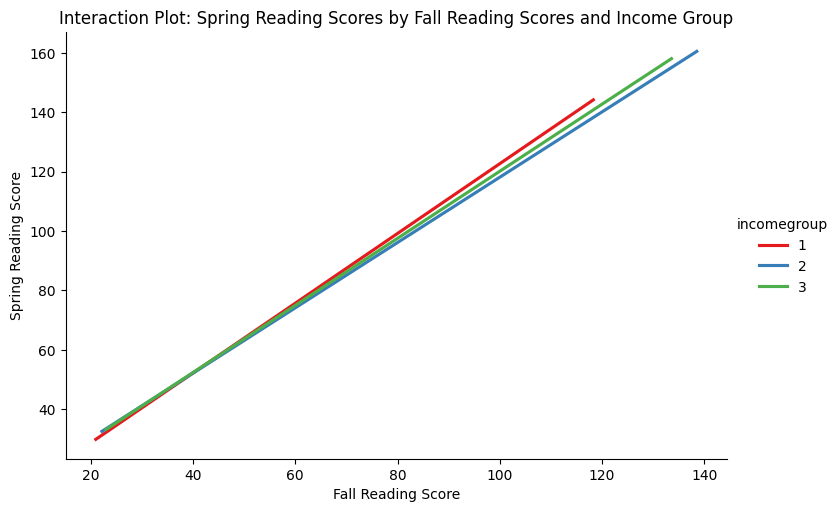

In [ ]:
# Create an interaction plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', data=df, aspect=1.5, ci=None, scatter=False, palette='Set1')

plt.title('Interaction Plot: Spring Reading Scores by Fall Reading Scores and Income Group')
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')

plt.show()

In [ ]:
# Perform ANCOVA test using statsmodels
model_reading = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=df).fit()
print("ANCOVA for Reading Scores:\n")
print(model_reading.summary())

ANCOVA for Reading Scores:

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:01:42   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Interc

In [ ]:
# Perform ANCOVA test using pingouin
pg.ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


### Assumption check

In [ ]:
# Checking Normality of Residuals
model_reading = ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=df).fit()

# Check normality of residuals
w, p_normality = stats.shapiro(model_reading.resid)
print(w,p_normality)

0.9119972586631775 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


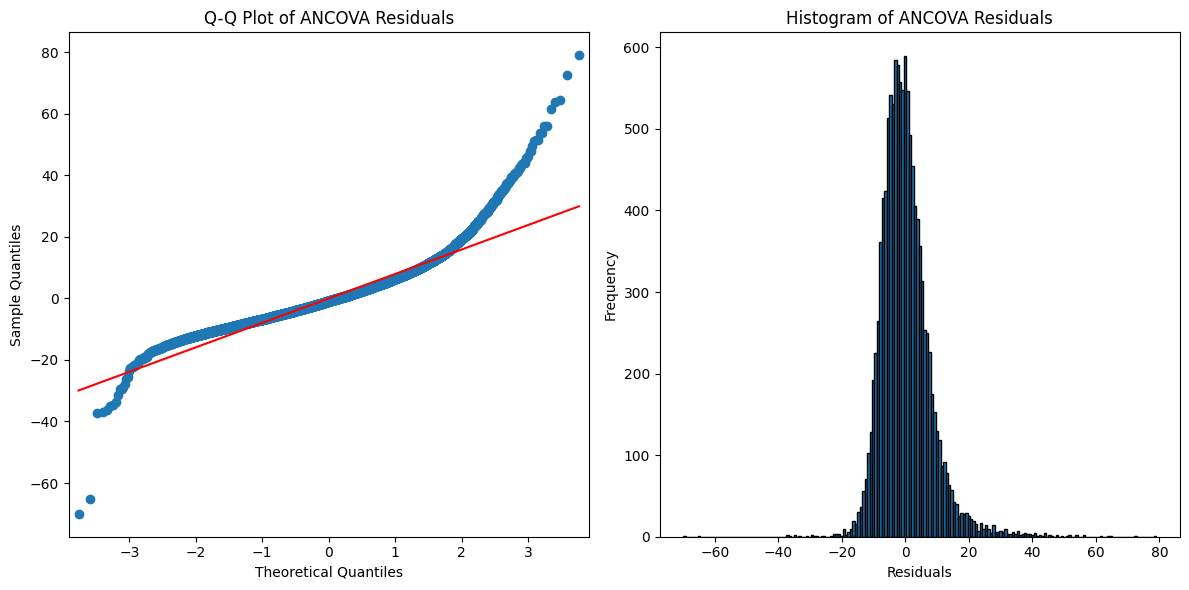

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# QQ plot for residuals to check normality
sm.qqplot(model_reading.resid, line='s', ax=axs[0])
axs[0].set_title('Q-Q Plot of ANCOVA Residuals')

# Histogram of residuals
axs[1].hist(model_reading.resid, bins='auto', histtype='bar', ec='k')
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of ANCOVA Residuals")

# Display the plot with tight layout
plt.tight_layout()
plt.show()


In [ ]:
# Levene's Test for Homogeneity of Variances
levene_test = pg.homoscedasticity(data=df, dv='springreadingscore', group='incomegroup')
print(levene_test)

               W          pval  equal_var
levene  39.55283  7.570500e-18      False


### Post-hoc test

In [ ]:
# Perform Tukey's HSD Post Hoc Test

# Calculate the adjusted dependent variable to compare groups on a more equal footing
df['adj_reading_score'] = model_reading.fittedvalues

# Perform Tukey's HSD
tukey_results = pairwise_tukeyhsd(endog=df['adj_reading_score'], groups=df['incomegroup'], alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.3444   0.0 3.7597 4.9291   True
     1      3   8.5418   0.0 7.9456 9.1381   True
     2      3   4.1974   0.0 3.5681 4.8268   True
-------------------------------------------------


## Research Question 2: How do income groups influence spring math scores among kindergarten students, after controlling for their  fall math scores?

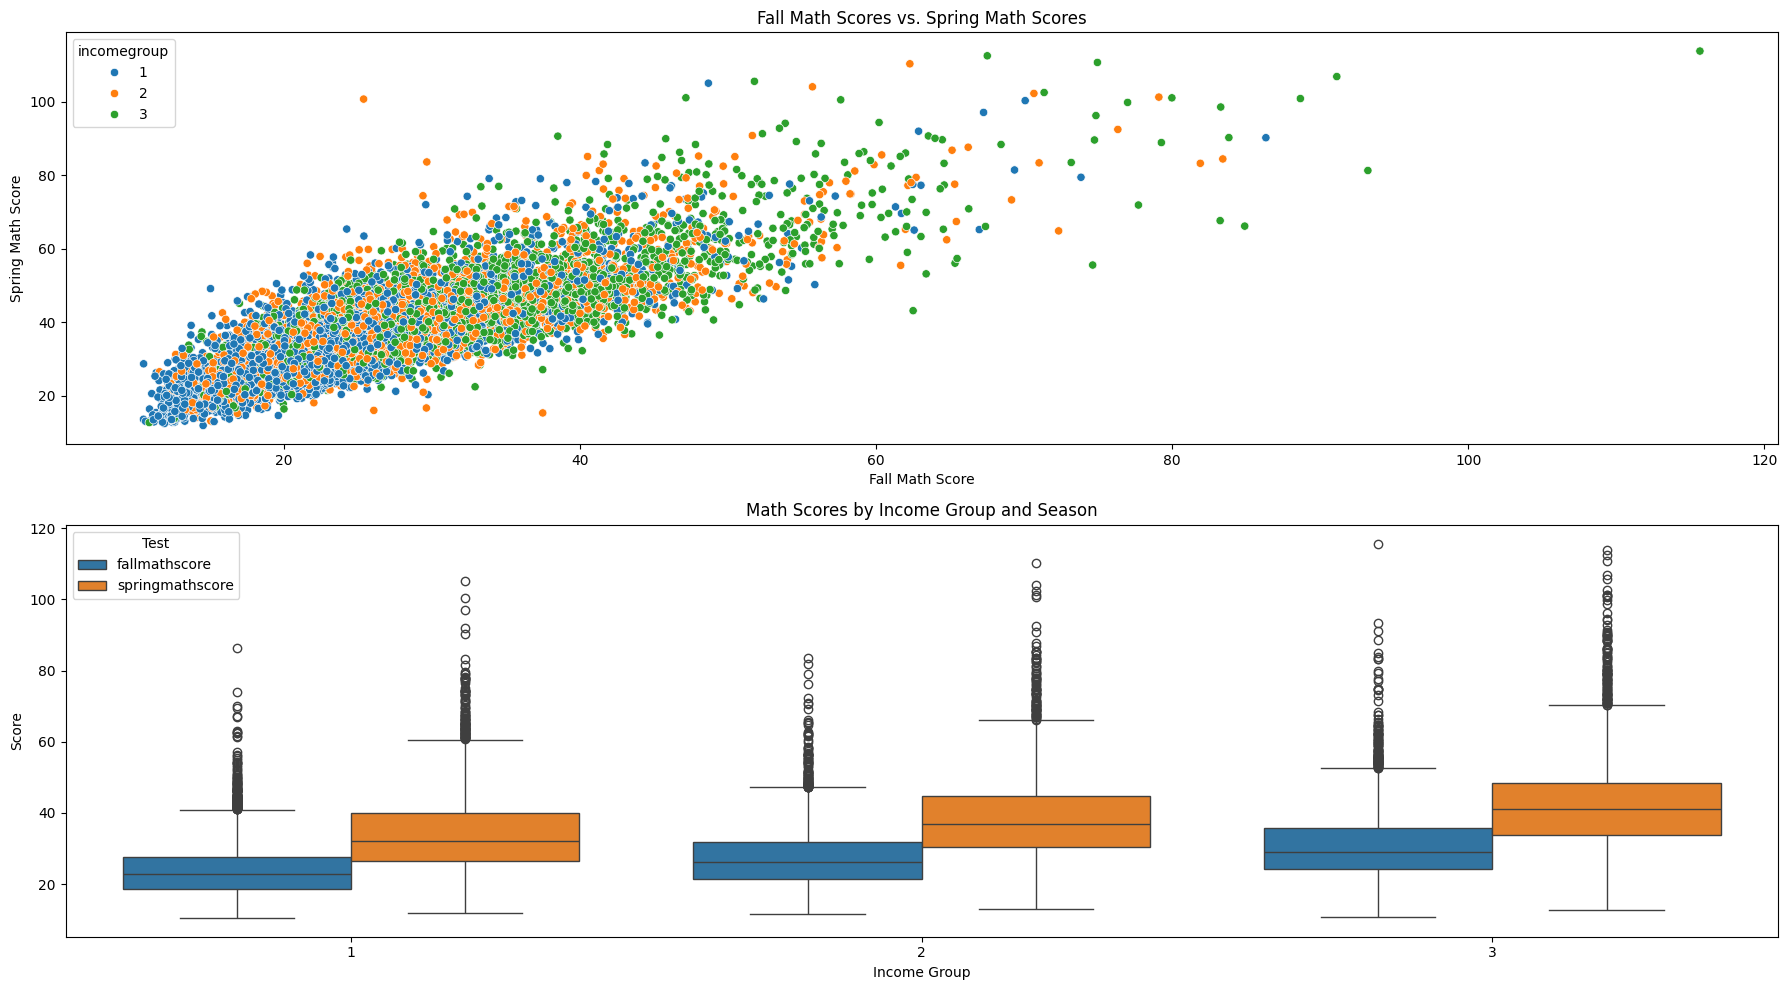

In [ ]:
# Correcting the subplot creation for a single-column subplot layout
fig, axs = plt.subplots(nrows=2, figsize=(18, 10))

# Scatter plot for fall math scores vs. spring math scores
sns.scatterplot(data=df, x="fallmathscore", y="springmathscore", hue="incomegroup", ax=axs[0])
axs[0].set_title('Fall Math Scores vs. Spring Math Scores')
axs[0].set_xlabel('Fall Math Score')
axs[0].set_ylabel('Spring Math Score')

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted_m = df.melt(id_vars='incomegroup', value_vars=['fallmathscore', 'springmathscore'],
                     var_name='test', value_name='score')

# Create a boxplot
sns.boxplot(data=df_melted_m, x='incomegroup', y='score', hue='test', ax=axs[1])
axs[1].set_title('Math Scores by Income Group and Season')
axs[1].set_xlabel('Income Group')
axs[1].set_ylabel('Score')

# Adjust the legend for the second plot
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels, title='Test')

# Display the plot
plt.tight_layout()
plt.show()

### One-way ANCOVA test

<Figure size 1000x600 with 0 Axes>

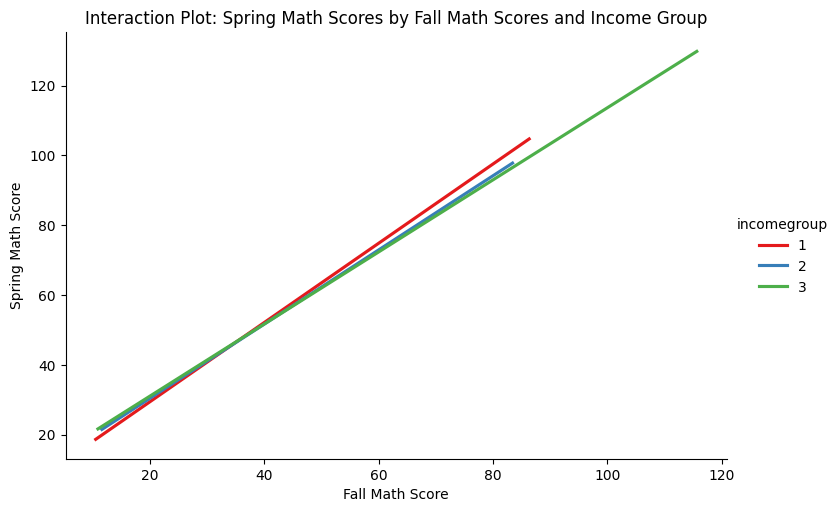

In [ ]:
# Create an interaction plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='fallmathscore', y='springmathscore', hue='incomegroup', data=df, aspect=1.5, ci=None, scatter=False, palette='Set1')

plt.title('Interaction Plot: Spring Math Scores by Fall Math Scores and Income Group')
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')

plt.show()

In [ ]:
# Perform ANCOVA test using statsmodels
model_math = ols('springmathscore ~ C(incomegroup) + fallmathscore', data=df).fit()
print("ANCOVA for Math Scores:\n")
print(model_math.summary())

ANCOVA for Math Scores:

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:01:54   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept

In [ ]:
# Perform ANCOVA test using pingouin
pg.ancova(data=df, dv='springmathscore', covar='fallmathscore', between='incomegroup')


,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


### Assumption check

In [ ]:
# Check normality of residuals
w, p_normality = stats.shapiro(model_math.resid)
print(w,p_normality)

0.9649319052696228 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


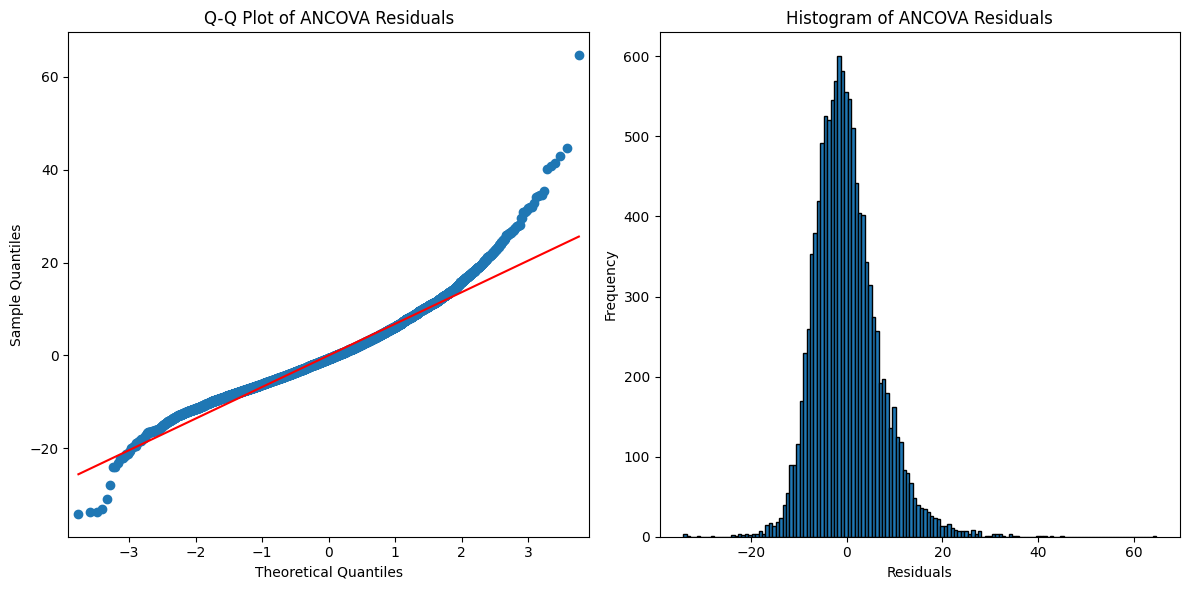

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# QQ plot for residuals to check normality
sm.qqplot(model_math.resid, line='s', ax=axs[0])
axs[0].set_title('Q-Q Plot of ANCOVA Residuals')

# Histogram of residuals
axs[1].hist(model_math.resid, bins='auto', histtype='bar', ec='k')
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of ANCOVA Residuals")

# Display the plot with tight layout
plt.tight_layout()
plt.show()


In [ ]:
# Levene's Test for Homogeneity of Variances
levene_test = pg.homoscedasticity(data=df, dv='springmathscore', group='incomegroup')
print(levene_test)

               W          pval  equal_var
levene  18.89985  6.380805e-09      False


### Post-hoc test

In [ ]:
# Perform Tukey's HSD Post Hoc Test

# Calculate the adjusted dependent variable to compare groups on a more equal footing
df['adj_math_score'] = model_math.fittedvalues

# Perform Tukey's HSD
tukey_results = pairwise_tukeyhsd(endog=df['adj_math_score'], groups=df['incomegroup'], alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.5816   0.0 4.1054 5.0579   True
     1      3   8.5288   0.0 8.0432 9.0145   True
     2      3   3.9472   0.0 3.4346 4.4598   True
-------------------------------------------------
